# Second Year Computational Physics
## Exercise 2

The deadline for this exercise is Monday 7th December 2020 at 12:30 p.m.  Your Jupyter notebook file (.ipynb) should be uploaded into Blackboard at the appropriate point in the Second Year Lab DLM (PHY2DLM_2020: Physics DLM Year 2 2020) course. *S. Hanna*

### Objectives of the exercise

* To become familiar with some basic tools for solving ordinary differential equations;
* To apply the Euler method to a 1D free fall problem with varying air resistance;

In this second exercise, as for the first, you will be required to submit a single notebook that addresses all of the points below.  You will need to complete the code cells with working Python code, and fill in the answers in the text cells. No report will be required.

## Problem: Free-fall with fixed or varying drag
On 14th October 2012, Felix Baumgartner set the world record for falling from a great height.  He jumped from a helium balloon at a height of 39045 m, fell for 4 minutes and 19 seconds and reached a maximum speed of 373 m s$^{-1}$. In this problem, you will solve the equations of motion for a free-falling object, and use your program to confirm, or otherwise, Felix Baumgartner's statistics. [In fact Felix BaumGartner's record stood until 24th October 2014, when Alan Eustace (a senior Google vice president) jumped from 41419 m, reaching a maximum speed of 367m s$^{-1}$. A sonic boom was heard by observers on the ground.  However, Eustace's attempt was very low-key compared with Baumgartner, and it is the latter who tends to be remembered.]

For a projectile travelling at speed through the air, the air resistance is proportional to the square of the velocity and acts in the opposite direction.  i.e. 

$$\mathbf{f} = -kv^2\hat{\mathbf{v}} = -k|\mathbf{v}|{\mathbf{v}}.$$

The  constant, $k$, is given by:
$$
k = \frac{C_\mathrm{d}\rho_0 A}{2}\qquad(1)
$$

in which $C_\mathrm{d}$ is the drag coefficient ($\sim0.47$ for a sphere; $\sim1.0-1.3$ for a sky diver or ski jumper), $A$ is the cross sectional area of the projectile and $\rho_0$ is the air density ($\sim1.2$ kg m$^{-3}$ at ambient temperature and pressure).  The resultant acceleration depends only on the weight and the air resistance:

$$m\mathbf{a} = m\mathbf{g}+\mathbf{f}$$

In this problem, the acceleration is varying, so application of Newton's second law produces a second order ODE to solve.  As illustrated in lectures, we can do this if we separate it into two first order equations, one for the derivative of the velocity, the other for the position:

$$\displaystyle m\frac{dv_y}{dt} = -mg-k\big|v_y\big|v_y\quad;\quad\frac{dy}{dt} = v_y\quad(2)$$

The $y$ coordinate is taken vertically upwards.   Euler's method for solving:

$$\frac{dy}{dt} = f(y,t)$$ is summarised by:

$$
y_{n+1} = y_n + \Delta t.f\left(y_n,t_n\right)\qquad;\qquad t_{n+1} = t_n + \Delta t \label{eq:euler}
$$

in which we are determining $y$ and $t$ at the $(n+1)$th step from their values at the $n$th step.  Applying this scheme to Eqs. (1) and (2), we obtain:

\begin{eqnarray*}
\label{eq:eu1}v_{y,n+1} &=&v_{y,n} - \Delta t\left(g+\frac{k}{m}\big|v_{y,n}\big|v_{y,n}\right)\quad(3)\\[2ex]
y_{n+1} &=& y_n + \Delta t.v_{y,n}\quad(4)\\[2ex]
\label{eq:eu3}t_{n+1} &=& t_n + \Delta t\quad(5)\\[1ex]\nonumber
\end{eqnarray*}

If we provide the initial conditions i.e. $y_0$ and $v_{y,0}$, we can use the above scheme repeatedly to find $y$ and $v_y$ for all $t$.

Attempt the following programming tasks and make sure you answer all the points raised in the appropriate cells in your notebook.

---

#### Part (a) 20% of marks
An analytical solution for Eqs (2) is given by the following expressions for height $y$ and vertical speed $v_y$:

\begin{eqnarray*}
y &=& y_0 - \frac{m}{k}\log_e\left[\cosh\left(\sqrt{\frac{kg}{m}}.t\right)\right]\quad(6)\\[2ex]
v_y &=& -\sqrt{\frac{mg}{k}}\tanh\left(\sqrt{\frac{kg}{m}}.t\right)\quad(7)
\end{eqnarray*}

These solutions apply for a free-falling object under constant gravity with constant drag factor, $k$.  In order to visualise them, adapt the code in the next cell.  Please note the following:

* You will need two arrays for the $y$ and $v_y$ values and you should plot them against your array of time values.

* You can set $y_0 = 1$ km, say, and calculate $y$ and $v_y$ for *any* $t$ using Eqs (6) and (7).  

* Choose sensible values for $k$ and $m$.

**N.B. You should make Python functions for the two expressions in Eqs (6) and (7), as these will be needed later in the exercise.**

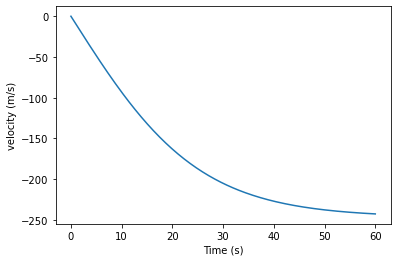

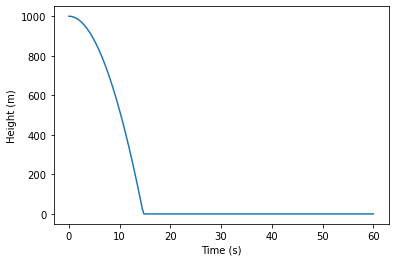

In [4]:
import numpy as np
import matplotlib.pyplot as plt

m= 62 
k= 0.00998
g= 9.8
startheight= 1000
numpoints = 200
tmin = 0.0
tmax = 60.0
tvals = np.linspace(tmin,tmax,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)

def height(tvals, tmin, tmax, numpoints, m, k): #funtion for how height varries with time according to equation 6
    for i in range(numpoints):
        yvals[i] =startheight-((m/k)*(np.log(np.cosh(np.sqrt(k*g/m)*tvals[i]))))
        yvals[i] = np.where(yvals[i]<0, 0, yvals[i])
    return yvals

def velocity(tvals, numpoints, m, k):  #funtion for how velocity varries with time according to equation 7
    for i in range (numpoints):
        vvals[i]= -(np.sqrt(m*g/k)*(np.tanh(np.sqrt(k*g/m)*tvals[i])))
        
    return vvals 
    
plt.plot(tvals, velocity(tvals,numpoints, m, k))
plt.xlabel('Time (s)')
plt.ylabel('velocity (m/s)')
plt.show()


plt.plot(tvals, height(tvals,yvals,tmax,numpoints,m, k))
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()

---
#### Part (b) 20% of marks
Now solve the free-fall problem using the Euler method, as outlined in Eqs (3) to (5), noting the following:

* Using a starting height of 1 km and zero initial velocity, calculate $y(t)$ and $v_y(t)$ for the falling body. 
* You will need to provide sensible values for $C_\mathrm{d}$, $A$ and $m$.   
* You will also need to specify a condition for ending the simulation i.e. when the body reaches the ground. 
* Put your time-stepping solution in the function template provided `freefall1()` - **this will be needed later in the exercise.**
* The code provided will enable you to plot your results.  

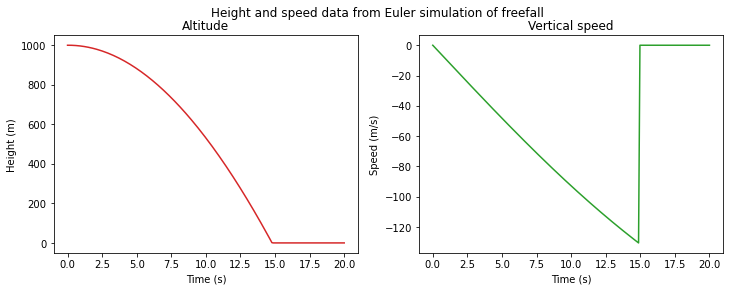

In [5]:



maxtime = 20.0
numpoints = 200 # number of points in simulation (including starting point)
startheight = 1000.0 # initial height in meters
startspeed = 0.0 # initial speed in m/s

g = 9.81 # acceleration due to freefall in m/s^2
k= 0.00998  
m = 62 #mass in kg


tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)


def freefall1 (initialheight, initialspeed, maximumtime, numberofpoints, tvalues, yvalues, vyvalues, dt):
    """
    Function to solve free fall equations using Euler method.
    """

    for i in range(numpoints):
        vvals[0]= startspeed
        yvals[0]= startheight
        vvals[i+1] = vvals[i]-dt*(g+(k/m)*abs(vvals[i])*vvals[i])
        yvals[i+1] = yvals[i]+dt*vvals[i]
        if yvals[i+1] <= 0:
            yvals[i+1]= 0 
            break
    finalstate = (tvals,yvals,vvals)
    return finalstate


final_coords = freefall1(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,0.1)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red')
ax2.plot(tvals,vvals,'tab:green')

---

* In the cell below, you should call your `freefall1()` function a number of times with different values of $\Delta t$ and different vaues of the ratio $k/m$.  
* You should plot your results, and include the analytical predictions on the same axes, using the functions you wrote in part (a).  
* As a guide, you should produce plots for two different values of $\Delta t$ and two different values of $k/m$.
* Make sure each plot is appropriately labelled with the parameters used.

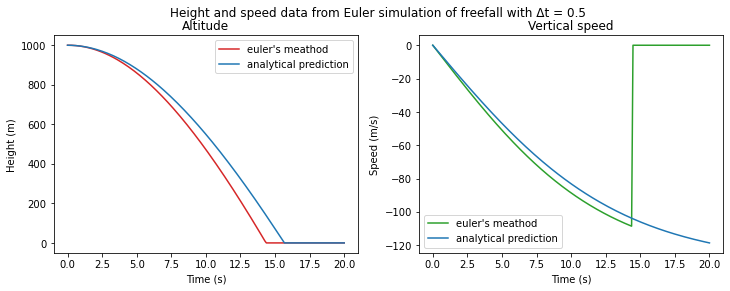

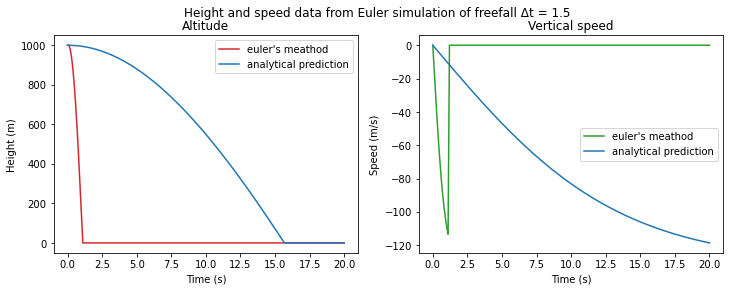

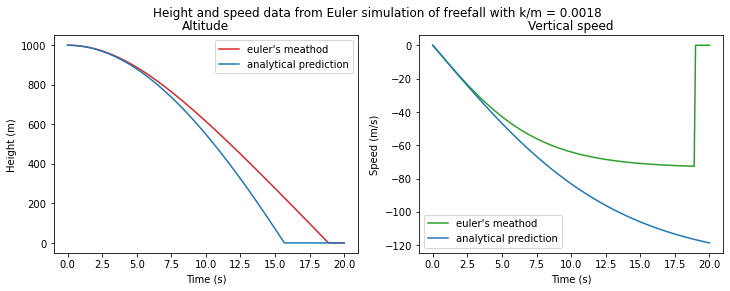

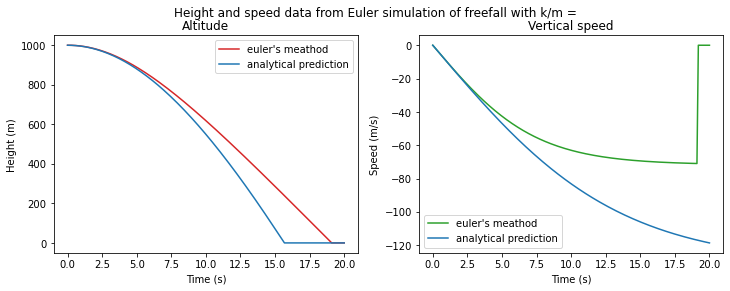

In [6]:

k= 0.03534
m = 62

tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)

final_coords = freefall1(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,0.11)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall with Δt = 0.5')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red', label = "euler's meathod")
ax1.plot(tvals,height(tvals, 0, maxtime, numpoints, 62, 0.03534),'tab:blue', label = "analytical prediction")
ax1.legend()
ax2.plot(tvals,vvals,'tab:green', label = "euler's meathod")
ax2.plot(tvals,velocity(tvals, numpoints, 62, 0.03534), label = "analytical prediction")
ax2.legend()


k= 0.03534
m = 62

tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)

final_coords = freefall1(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,1.5)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall Δt = 1.5')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red', label = "euler's meathod")
ax1.plot(tvals,height(tvals, 0, maxtime, numpoints, 62, 0.03534),'tab:blue', label = "analytical prediction")
ax1.legend()
ax2.plot(tvals,vvals,'tab:green', label = "euler's meathod")
ax2.plot(tvals,velocity(tvals, numpoints, 62, 0.03534), label = "analytical prediction")
ax2.legend()


k= 0.04534
m = 25

tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)

final_coords = freefall1(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,0.1)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall with k/m = 0.0018')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red', label = "euler's meathod")
ax1.plot(tvals,height(tvals, 0, maxtime, numpoints, 62, 0.03534),'tab:blue', label = "analytical prediction")
ax1.legend()
ax2.plot(tvals,vvals,'tab:green', label = "euler's meathod")
ax2.plot(tvals,velocity(tvals, numpoints, 62, 0.03534), label = "analytical prediction")
ax2.legend()


k= 0.09534
m = 50

tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)

final_coords = freefall1(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,0.1)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall with k/m = ')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red', label = "euler's meathod")
ax1.plot(tvals,height(tvals, 0, maxtime, numpoints, 62, 0.03534),'tab:blue', label = "analytical prediction")
ax1.legend()
ax2.plot(tvals,vvals,'tab:green', label = "euler's meathod")
ax2.plot(tvals,velocity(tvals, numpoints, 62, 0.03534), label = "analytical prediction")
ax2.legend()





In the cell below, briefly address the following points:

1. How does the accuracy of your numerical solution vary with the step size used, $\Delta t$?
2. What is the largest value of $\Delta t$ that produces reliable solutions? Can you quantify the accuracy?
3. Describe the effect on the motion of varying the ratio $k/m$.

   Answers:
1. decreasing delta t increases the accurracy of the numerical solution, i.e the soulution gets closer to the analytical prediction.
2. when delta is equal to 0.1 eulers meathod gives a good estimate. 
3. increasing the k/m ratio causes the mass to reach terminal velocity faster so the mass reaches the the ground slower. 

---
#### Part (d) 20% of marks
Now you are going to make the problem more realistic.  Baumgartner jumped from very high altitude, where the air density is very low, and so the drag factor, $k$ should be replaced with a function $k(y)$.  The simplest way to approach this is to make use of the scale height for the atmosphere, $h$, and model the variation of density as an exponential decay:
$$
\rho(y) = \rho_0\exp(-y/h)
$$

from which $k(y)$ follows using Eq. (1).  An appropriate value of $h$ appears to be 7.64 km [see http://en.wikipedia.org/wiki/Scale_height ].

* In the cell below, copy your `freefall1()` function to a new function `freefall2()`, and adapt it to use $\rho(y)$ instead of $\rho_0$.  

* Test your function using the parameters for Baumgartner's jump, and plot $y(t)$ and $v_y(t)$ against time.  

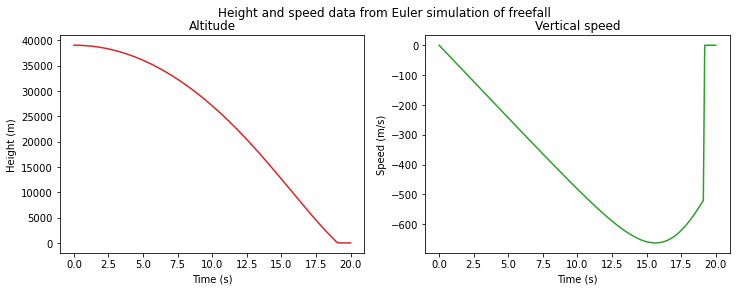

In [9]:


maxtime = 20.0
numpoints = 200 
startheight = 39045 
startspeed = 0.0 
g = 9.81
m = 62
P0 = 1.2 #intitial air density in kg/m^3
C = 0.47 #drag coeff
A = 0.03534 #cross sectional area
h = 7640
m = 110 #mass of Baumgartner


tvals = np.linspace(0.0,maxtime,numpoints)
yvals = np.zeros(numpoints)
vvals = np.zeros(numpoints)
pvals = np.zeros(numpoints)

def freefall2 (initialheight, initialspeed, maximumtime, numberofpoints, tvalues, yvalues, vyvalues, dt):
    """
    Function to solve free fall equations using Euler method with varing air density. 
    """
    vvals[0]= startspeed
    yvals[0]= startheight
    for i in range(numpoints):
        pvals[i]= P0*math.exp(-yvals[i]/h) 
        vvals[i+1] = vvals[i]-dt*(g+((C*pvals[i]*A*0.5)/m)*abs(vvals[i])*vvals[i])
        yvals[i+1] = yvals[i]+dt*vvals[i]
        if yvals[i+1] <= 0:
            yvals[i+1]= 0
            break
    finalstate = (tvals,yvals,vvals)
    return finalstate


final_coords = freefall2(startheight,startspeed,maxtime,numpoints,tvals,yvals,vvals,0.5)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
fig.suptitle('Height and speed data from Euler simulation of freefall')
ax1.set(xlabel='Time (s)', ylabel='Height (m)', title='Altitude')
ax2.set(xlabel='Time (s)', ylabel='Speed (m/s)', title='Vertical speed')

ax1.plot(tvals,yvals,'tab:red')
ax2.plot(tvals,vvals,'tab:green')




---
There was great interest in whether Baumgartner would break the sound barrier during his jump. The speed of sound in a gas varies with the temperature:

$$v_s = \sqrt{\frac{\gamma RT}{M}}$$

where $\gamma$ is 1.4 for air, $R$ is the molar gas constant and $T$ is the absolute temperature in Kelvin. $M$ is the molar mass of the gas, which for dry air is about 0.028,964,5 kg/mol. The atmospheric temperature varies with altitude, $H$, as follows:

\begin{eqnarray*}
\mbox{Troposphere:}\quad&H\leq11000\,\mathrm{m}\quad& T(\mathrm{K}) = 288.0-0.0065H\\
\mbox{Lower Stratosphere:}\quad &11000<H\leq25100\,\mathrm{m}\quad& T(\mathrm{K}) = 216.5\\
\mbox{Upper Stratosphere:}\quad& H>25100\,\mathrm{m}\quad& T(\mathrm{K}) = 141.3+0.0030H
\end{eqnarray*}

Using the information above and your function `freefall2()`, write a short program in the following cell to determine Baumgartner's maximum Mach number (fraction of the speed of sound) as he falls.


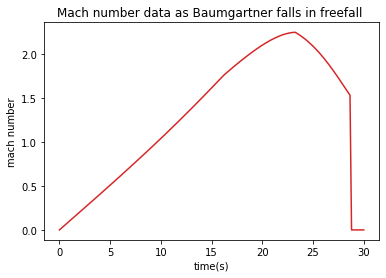

max mach reached by Baumgartner:
2.247330361075449


In [8]:
mach= np.zeros(numpoints)
vs = np.zeros(numpoints) #speed of sound
gamma = 1.4
r = 8.3
M = 0.0289645
maxtime = 30.0
numpoints = 200

tvals = np.linspace(0.0,maxtime,numpoints)

for i in range(numpoints):
    h= yvals[i]
    if h<= 11000:
        t= 288-(0.0065*h)
        vs[i] = np.sqrt(gamma*r*t/M)
        mach[i] = -vvals[i]/vs[i]
    if (h>=11000) and (h<= 25100):
        t = 216.5
        vs[i] = np.sqrt(gamma*r*t/M)
        mach[i] = -vvals[i]/vs[i]
    if h>= 25100:
        t = 141.3+(0.003*h)
        vs[i] = np.sqrt(gamma*r*t/M)
        mach[i] = -vvals[i]/vs[i]



plt.plot(tvals,mach, 'tab:red')
plt.title('Mach number data as Baumgartner falls in freefall ')
plt.xlabel('time(s)')
plt.ylabel('mach number')
plt.show()

print('max mach reached by Baumgartner:')
print(np.max(mach))

---
